# Imports

In [3]:
import spacy
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
import sys
import pickle
import plotnine as p9
import warnings
import importlib

from plotnine import *
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from matplotlib.pyplot import figure
from collections import Counter
from matplotlib import pyplot as plt
from spacytextblob.spacytextblob import SpacyTextBlob

warnings.filterwarnings('ignore')
en = spacy.load("en_core_web_md")
en.add_pipe('spacytextblob')
nltk.download('punkt')
pd.options.plotting.backend = "plotly"
sys.path.insert(0, 'C:/Users/Hubert/Dropbox/NLP/Project/eda_for_nlp_package.py')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hubert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Eda package

In [4]:
import eda_for_nlp_package as eda
importlib.reload(eda)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hubert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hubert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<module 'eda_for_nlp_package' from 'c:\\Users\\Hubert\\Dropbox\\NLP\\Project\\EDA\\eda_for_nlp_package.py'>

# Data preparation

According to the paper https://www.researchgate.net/publication/319178537_A_Comparison_of_Pre-processing_Techniques_for_Twitter_Sentiment_Analysis, we can evaluate various preprocessing strategies for classification task as:
- Best: Removing numbers, Replace repetition of punctuation, stemming
- Good: negation handling, lemmatization, replacing urls and mentions
- Poor: lowercasing, replacing slang and abbreviations, replancing negations with antonyms, spelling correction
- Worst: removing punctuation
- Varying: lowercase, replancing long words, replacing contractions

In [20]:
df = pd.read_csv('opensources_fake_news_cleaned.csv', nrows=1000)
df.head()

,id,type,domain,scraped_at,url,authors,title,content
0,4059478,political,dailycaller.com,2017-11-27,http://dailycaller.com/2010/03/26/the-top-8-mo...,NaN,The top 6 bloggers &/or personalities that are...,To commemorate this week’s launch of the news ...
1,4059479,bias,lifenews.com,2017-11-27,https://consciouslifenews.com/iran-blamed-911/...,Greg Scott,Iran Now Blamed for 9/11,FAIR USE NOTICE. Many of the stories on this s...
2,4059480,political,dailycaller.com,2017-11-27,http://dailycaller.com/buzz/massachusettsunite...,"Jeff Winkler, Jonathan Strong, Ken Blackwell, ...",The Daily Caller,New Hampshire is the state with the highest me...
3,4059482,fake,coed.com,2017-11-27,https://coed.com/2014/08/29/abigail-ratchford-...,"President, Executive Editor - Coed Media Group...",Abigail Ratchford is Winning Instagram [30 PHO...,Abigail Ratchford‘s Instagram page is a force ...
4,4059484,fake,coed.com,2017-11-27,https://coed.com/2010/04/09/how-to-have-sex-in...,NaN,How To: Have Sex In A Car,Nothing says “I love you” like a sweat-stained...


## Tokenization

In [21]:
docs = eda.tokenize(df, en, 'content')
docs.head()

0    (To, commemorate, this, week, ’s, launch, of, ...
1    (FAIR, USE, NOTICE, ., Many, of, the, stories,...
2    (New, Hampshire, is, the, state, with, the, hi...
3    (Abigail, Ratchford‘s, Instagram, page, is, a,...
4    (Nothing, says, “, I, love, you, ”, like, a, s...
Name: content, dtype: object

In [22]:

pickle.dump(en, open("en_dump.pickle", "wb"))
pickle.dump(docs, open("docs_dump.pickle", "wb"))


en = pickle.load(open("en_dump.pickle", "rb"))
docs = pickle.load(open("docs_dump.pickle", "rb"))

In [23]:
docs

0      (To, commemorate, this, week, ’s, launch, of, ...
1      (FAIR, USE, NOTICE, ., Many, of, the, stories,...
2      (New, Hampshire, is, the, state, with, the, hi...
3      (Abigail, Ratchford‘s, Instagram, page, is, a,...
4      (Nothing, says, “, I, love, you, ”, like, a, s...
                             ...                        
995    (Green, Party, candidate, Jill, Stein, has, ra...
996    (The, Hillary, Clinton, campaign, issued, a, r...
997    (Incoming, White, House, press, secretary, Sea...
998    (After, confirming, and, reassuring, that, he,...
999    (Trey, Gowdy, just, told, Fox, News, ’, “, The...
Name: content, Length: 1000, dtype: object

## More stats

In [24]:
df = eda.add_stats(df, docs)
df.head()

,id,type,domain,scraped_at,url,authors,title,content,word_count,char_count,word_density,polarity,subjectivity
0,4059478,political,dailycaller.com,2017-11-27,http://dailycaller.com/2010/03/26/the-top-8-mo...,NaN,The top 6 bloggers &/or personalities that are...,To commemorate this week’s launch of the news ...,453,2213,0.204607,0.177502,0.503539
1,4059479,bias,lifenews.com,2017-11-27,https://consciouslifenews.com/iran-blamed-911/...,Greg Scott,Iran Now Blamed for 9/11,FAIR USE NOTICE. Many of the stories on this s...,244,1256,0.194113,0.288636,0.525000
2,4059480,political,dailycaller.com,2017-11-27,http://dailycaller.com/buzz/massachusettsunite...,"Jeff Winkler, Jonathan Strong, Ken Blackwell, ...",The Daily Caller,New Hampshire is the state with the highest me...,26,132,0.195489,0.136364,0.454545
3,4059482,fake,coed.com,2017-11-27,https://coed.com/2014/08/29/abigail-ratchford-...,"President, Executive Editor - Coed Media Group...",Abigail Ratchford is Winning Instagram [30 PHO...,Abigail Ratchford‘s Instagram page is a force ...,113,533,0.211610,0.064336,0.365734
4,4059484,fake,coed.com,2017-11-27,https://coed.com/2010/04/09/how-to-have-sex-in...,NaN,How To: Have Sex In A Car,Nothing says “I love you” like a sweat-stained...,897,4185,0.214286,0.160943,0.576642


## Visualizations

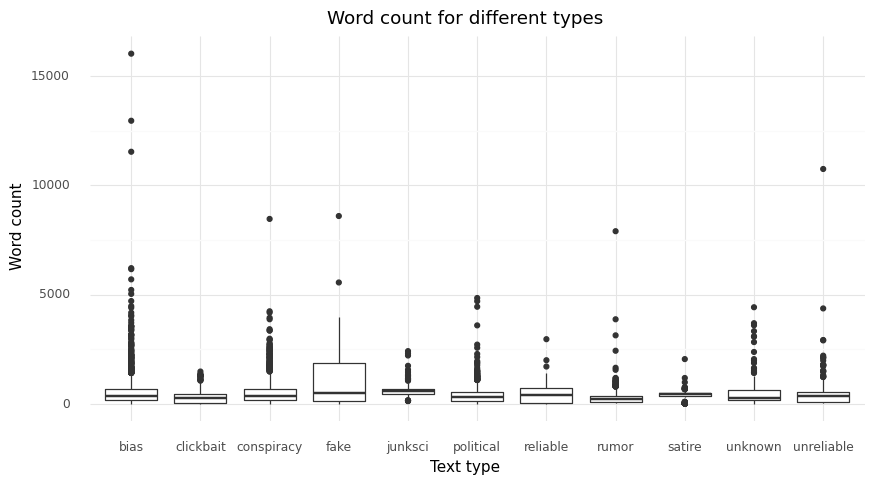

<ggplot: (120343348149)>

In [159]:
(
    ggplot(df, aes(y='word_count', x = 'type')) + 
    geom_boxplot() +
    theme_minimal() +
    labs(title='Word count for different types', y='Word count', x='Text type')
)

Fake news, and conspiracy have much longer text lengths than other categories.

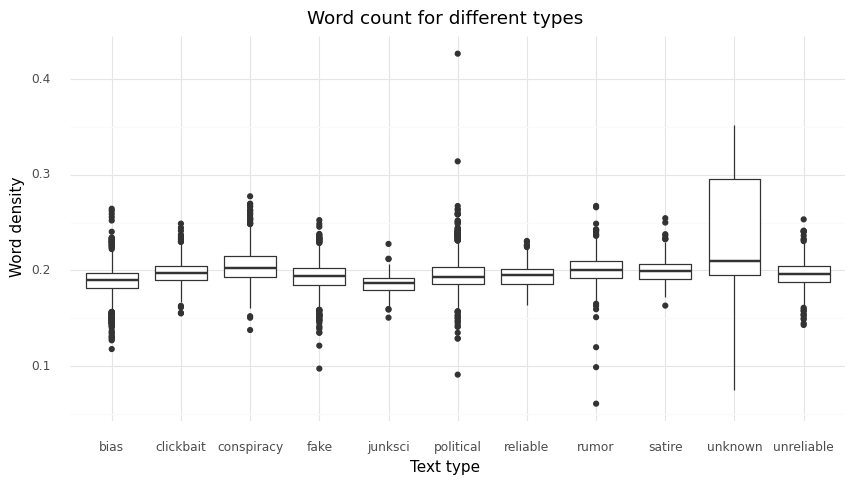

<ggplot: (120402495834)>

In [160]:
(
    ggplot(df, aes(y='word_density', x = 'type')) + 
    geom_boxplot() +
    theme_minimal() +
    labs(title='Word count for different types', y='Word density', x='Text type')
)

Question: Which categories do we want to include in our study?

# Text length

Mostly short - to medium length texts

In [161]:
eda.plot_len_dist(docs, False)

# Popular nouns

Using just the sole nouns is able to get us some information about the dataset, but also picks up the meaningless terms like year, day, life, etc. We should focus on a more fined tuned methods.

In [162]:
nouns        = eda.get_nouns(docs)
noun_freq    = Counter(nouns)
common_nouns = noun_freq.most_common(30)
count_nouns  = pd.DataFrame(common_nouns, columns = ['noun', 'count'])
eda.plot_counts(count_nouns, ['noun', 'count'], width=800, height=600)

# Word cloud

The word cloud provides similar information as the previous method. Provided results are meaningless.

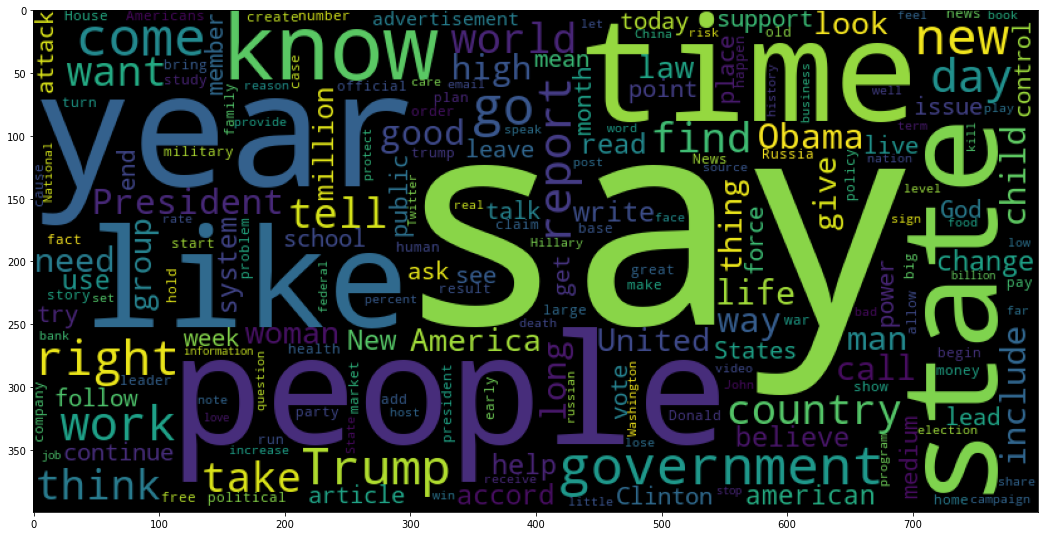

In [163]:
word_counts = eda.lemmatized_word_cloud(docs, width=800, height=400)

# Named Entities

These are mostly countries, or people. Most of them is associated with the USA. It might be useful for topic detection.

In [25]:
proper_ets = eda.organisation_like_entitites(docs)
count_ent = proper_ets.value_counts()
count_ent = count_ent.reset_index()
count_ent.columns =["entity","type","count"]
eda.plot_counts(count_ent[:30],["entity","count"], width=800, height=600)

 # TF-IDF
 The plot belows counts how many times given lemma occured in the top 10 important lemmas among all documents

In [165]:
top_tfidf = eda.tfidf_table(df['content'], en, top=10)
count_terms = eda.counts_tfidf(top_tfidf)
eda.plot_counts(count_terms, ['term', 'count'], width=800, height=800)

We can see that the most popular lemmas were connected to the USA politics stage (and russia). When we get lower on the list we can see plenty of terms that actually might be parts of larger clusters. In my opinion it might be useful for topic detection. However the deletion of numbers might be useful, as they tend to be very high on the list

In [166]:
top_tfidf

,term_0,score_0,term_1,score_1,term_2,score_2,term_3,score_3,term_4,score_4,...,term_9995,score_9995,term_9996,score_9996,term_9997,score_9997,term_9998,score_9998,term_9999,score_9999
0,klein,59.395702,copyright,23.847780,income,8.834854,abigail,24.793591,sex,32.953044,...,brokaw,35.296584,россии,55.618751,immigration,134.703858,protected,81.240920,candidates,62.410148
1,fehbp,19.034586,material,22.305237,census,6.626921,instagram,11.707463,car,25.996228,...,polled,21.644124,на,42.471139,org,74.435484,email,69.526993,deweese,43.920412
2,ezra,15.451067,copyrighted,20.141798,median,6.572854,ratchford,9.517293,shifter,19.034586,...,nbc,20.516144,фракции,28.551880,www,70.317566,org,61.299810,property,43.844403
3,private,14.361469,use,19.298149,hampshire,6.099567,homegirl,9.111828,bedroom,19.017718,...,mccain,20.516144,россиян,25.803007,numbersusa,42.093404,www,56.254053,elected,37.599699
4,bloggers,14.238796,fair,17.432952,bureau,5.366253,gone,8.032070,quickie,18.223656,...,results,15.438219,году,21.497754,america,33.371034,america,36.151954,questions,35.661577
5,tipped,13.552906,purposes,14.066938,poverty,5.039956,reckoned,8.013216,backseat,16.529060,...,obama,14.659057,ру,20.427729,americans,31.716568,muslims,32.684238,issues,31.271943
6,health,12.444954,owner,13.836055,insurance,4.445249,boulevard,7.812545,location,14.954081,...,polls,13.903474,летние,19.034586,american,28.326501,muslim,30.568272,federal,28.489817
7,premiums,12.232192,site,11.893001,highest,4.270269,138,7.320069,scene,14.291109,...,newsweek,13.427866,единой,19.034586,fairus,26.472438,numbersusa,25.256043,tom,27.389961
8,acid,11.656827,conscious,11.038185,nation,3.305690,sunset,7.320069,sweat,13.829207,...,advertisement,11.933977,каникулы,18.223656,capsweb,26.472438,enemy,23.326315,education,26.956065
9,howard,11.559247,provided,8.073309,report,3.212844,billboard,7.119398,caught,13.373603,...,myth,11.733270,отпуска,18.223656,borders,24.712911,lewis,22.711363,ask,26.883776


# Ngrams

The ngrams are useful in general, but in this case i feel like they dont give enough feedback.

## Bi-grams

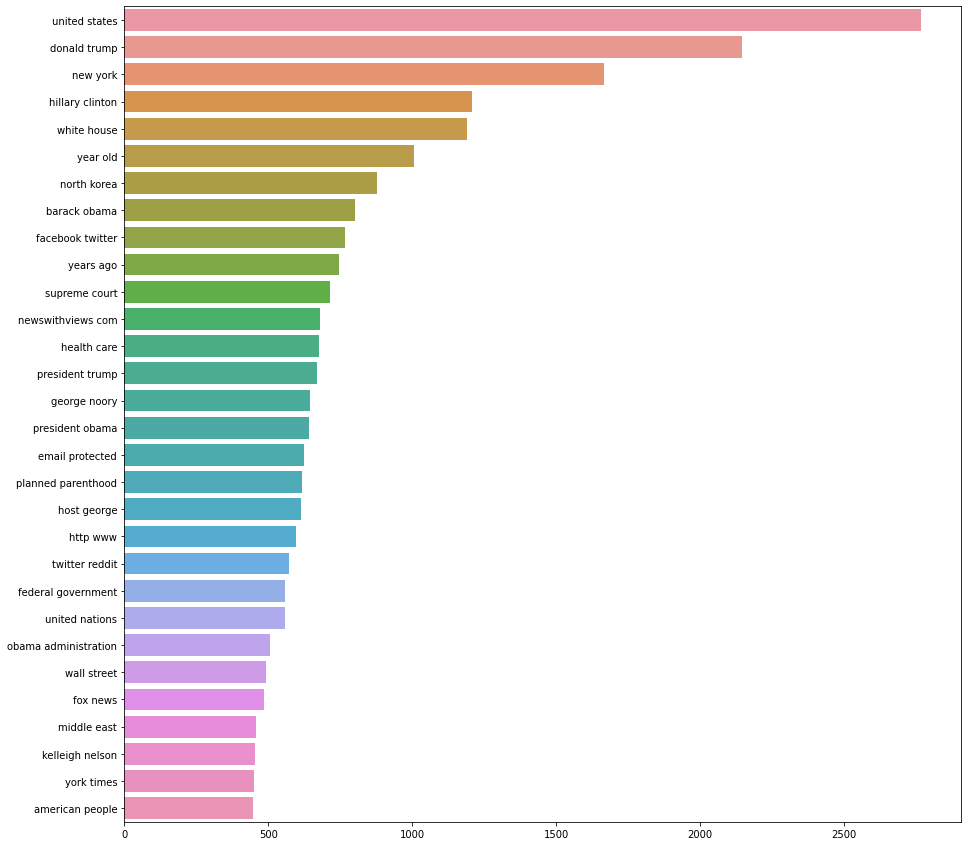

In [167]:
stopwords     = en.Defaults.stop_words
top_n_bigrams = eda.get_top_ngram(df['content'], stopwords = stopwords, n = 2, m = 2)[:30]
eda.plot_ngram(top_n_bigrams)

## Tri-grams

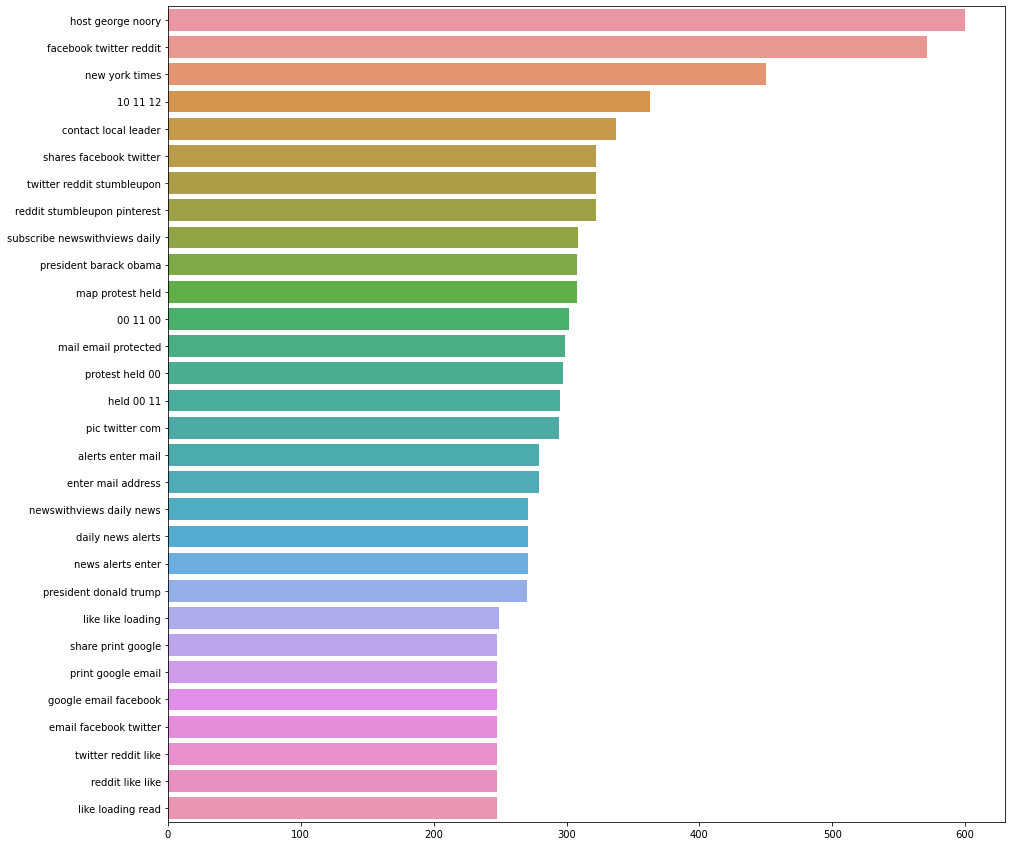

In [168]:
top_n_bigrams = eda.get_top_ngram(df['content'], stopwords = stopwords, n = 3, m = 3)[:30]
eda.plot_ngram(top_n_bigrams)

## 2-5 grams

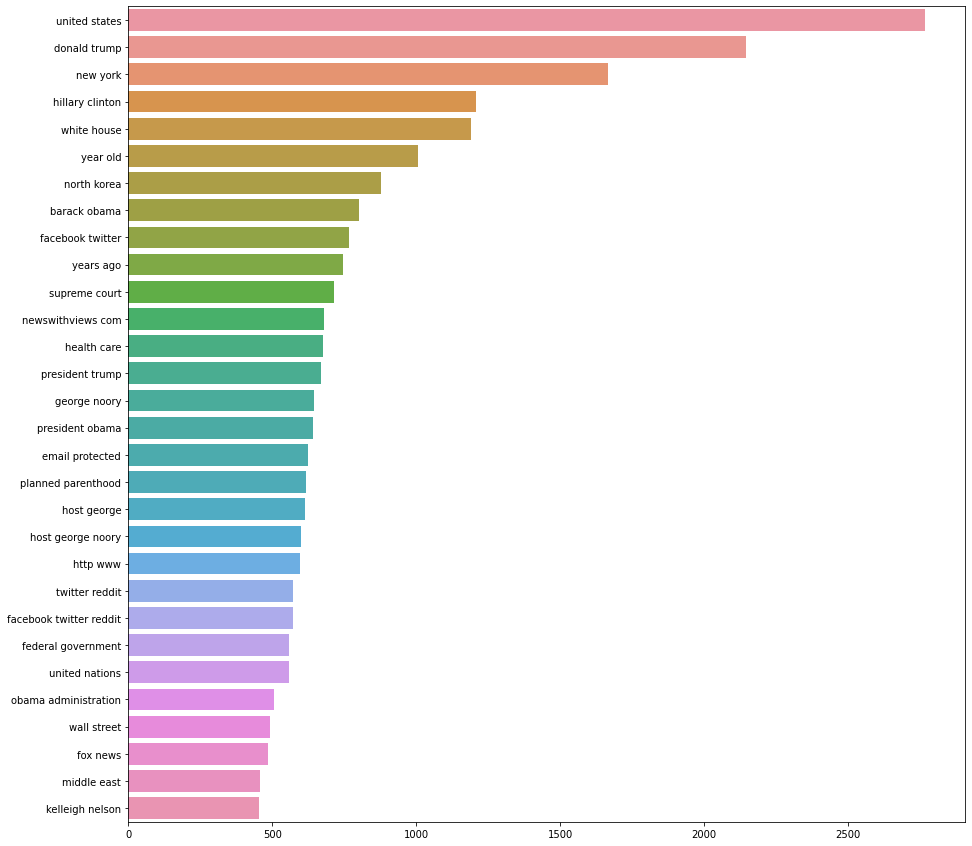

In [169]:
top_n_bigrams = eda.get_top_ngram(df['content'], stopwords = stopwords, n = 2, m = 5)[:30]
eda.plot_ngram(top_n_bigrams)

# Noun chunks

## With stopwords

In [170]:
noun_chunks = eda.get_noun_chunks(docs, stopwords = False)
noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))
count_chunks = eda.count_texts(noun_chunks,['chunk', 'count'],40)
eda.plot_counts(count_chunks,['chunk', 'count'], width=800, height=800)

## Without stopwords

In [171]:
noun_chunks = eda.get_noun_chunks(docs, stopwords = True)
noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))
count_chunks = eda.count_texts(noun_chunks,['chunk', 'count'],40)
eda.plot_counts(count_chunks,['chunk', 'count'], width=800, height=800)

The noun chunks definitely can help us with topic detection task.

# Sentiment

In [172]:
sentiment_df = eda.count_sentiment(docs)

## Stats for different types

Poalrity and subjectivity measures might be useful for the fake news detection.

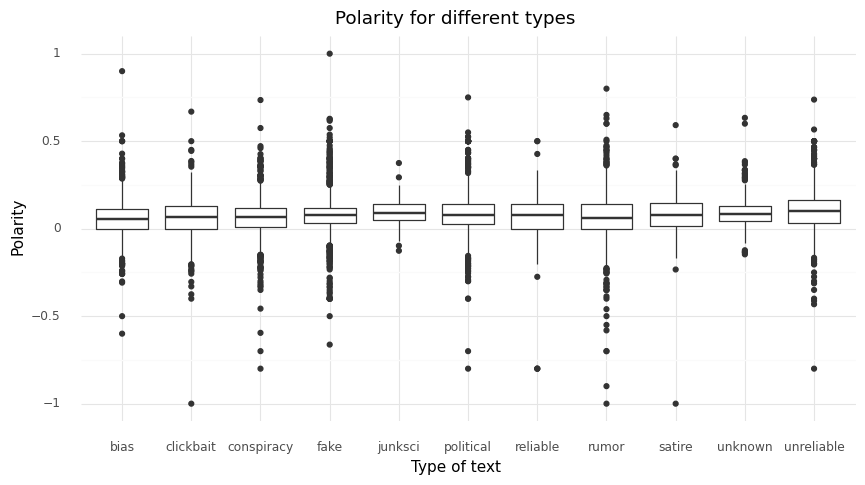

<ggplot: (120570360589)>

In [173]:
p9.options.figure_size = (10, 5)
(
    ggplot(df) # the rest of occurences is equal 0
    + aes(x='type', y='polarity')
    + geom_boxplot() 
    + theme_minimal()
    + labs(title='Polarity for different types', x='Type of text', y='Polarity')
)

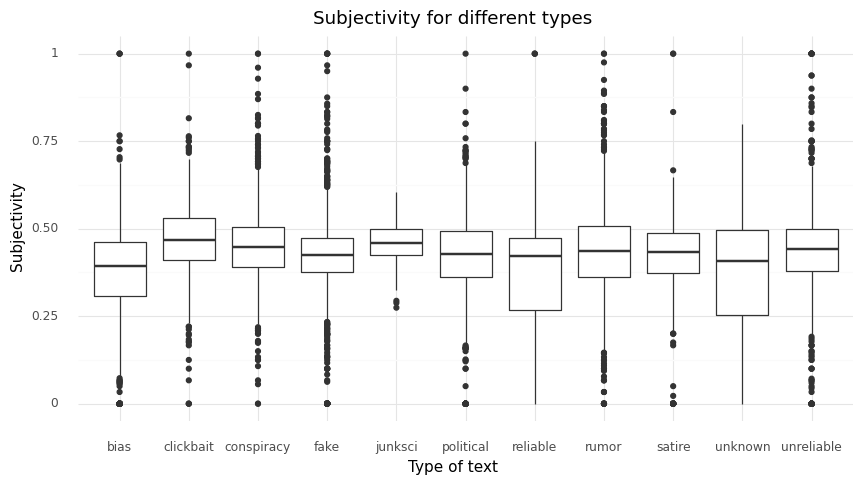

<ggplot: (120614509962)>

In [174]:
(
    ggplot(df) # the rest of occurences is equal 0
    + aes(x='type', y='subjectivity')
    + geom_boxplot() 
    + theme_minimal()
    + labs(title='Subjectivity for different types', x='Type of text', y='Subjectivity')
)

## Stats cumulative distribution

<BarContainer object of 10000 artists>

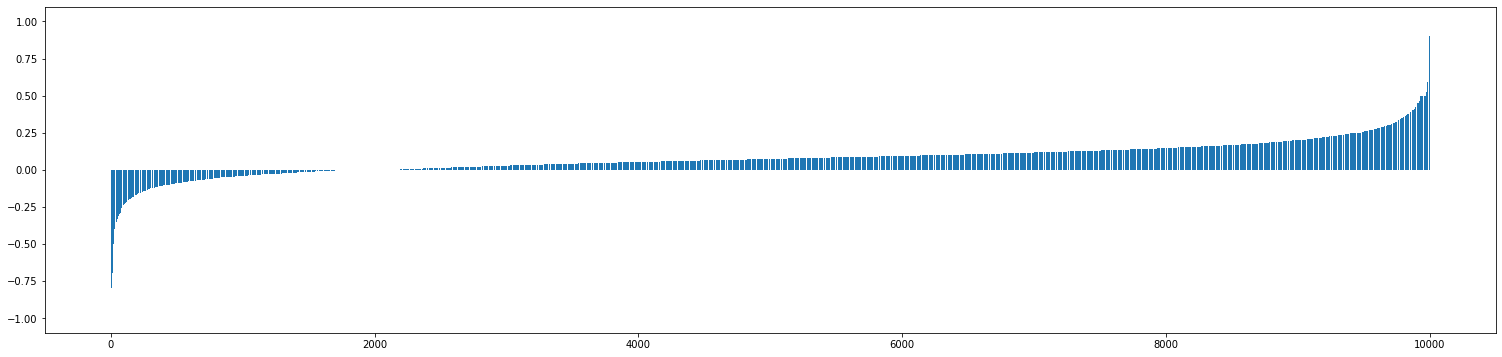

In [175]:
plt.figure(figsize=(26,6))
plt.bar(range(len(sentiment_df)), sentiment_df['polarity'].sort_values())

<BarContainer object of 10000 artists>

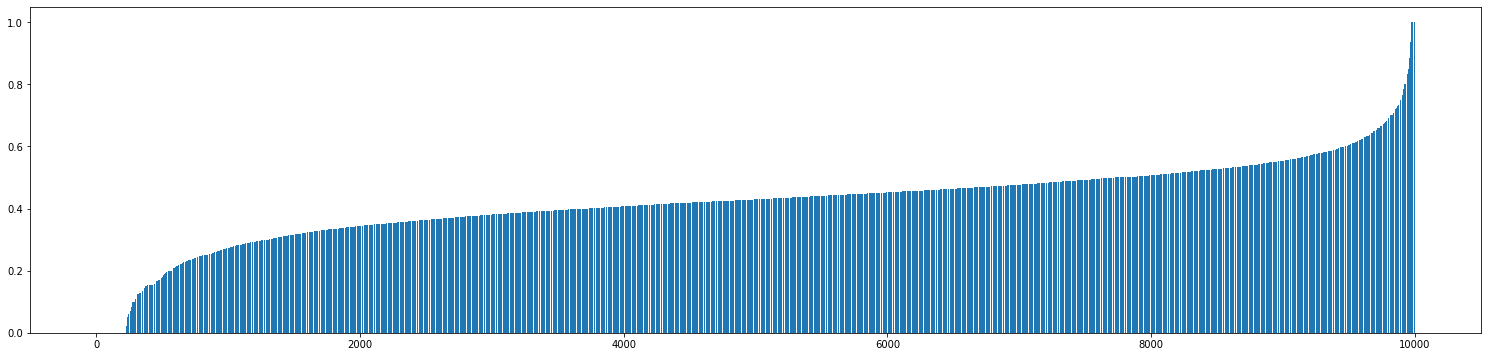

In [176]:
plt.figure(figsize=(26,6))
plt.bar(range(len(sentiment_df)), sentiment_df['subjectivity'].sort_values())